In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [18]:
def plot_data(time_points, untreated, treated):
    plt.figure(figsize=(12, 6))
    plt.plot(time_points, untreated, label="KPI if No Treatment", linestyle='--', marker='o', color="gray")
    plt.plot(time_points, treated, label="KPI if Treated", linestyle='--', marker='o', color="orange")

    # Highlight treatment point
    plt.axvline(x=-0.5, color="gray", linestyle="--", label="Treatment Introduced")
    plt.text(0, max(treated) - 0.2, "Treatment Starts", fontsize=12, color="gray")

    # Aesthetic improvements
    plt.title("Interrupted Time Series: Trend Change", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Outcome Measure", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Display the plot
    plt.show()


#### ITS with a level change only

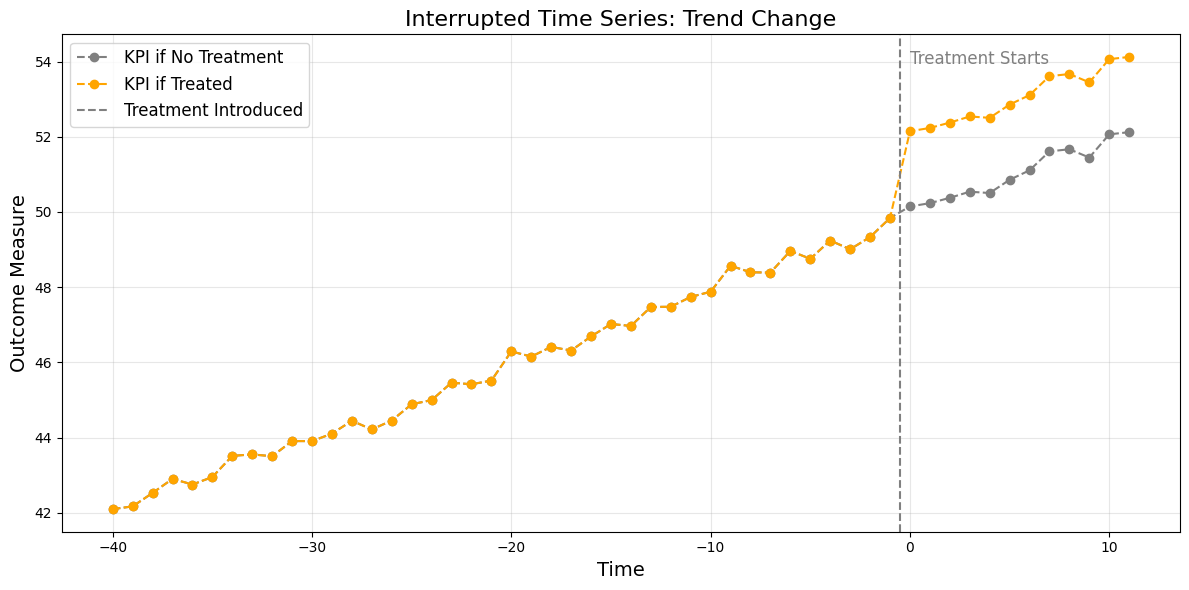

In [19]:

# Simulate time series data
np.random.seed(42)

numobs = 52
event_period = 40  # Treatment starts at week 40 (4th quarter)

time_points = np.arange(numobs) - event_period
untreated = np.random.normal(50, .2, numobs) + 0.2*time_points # Potential Outcome: trend absent treatment

# Post-treatment divergence: level change 
level_change = 2*np.ones(numobs)
level_change[:event_period] = 0
treated = untreated + level_change

plot_data(time_points, untreated, treated)

In [20]:
# Estimate model with level change only

# prepare DataFrame for model
df = pd.DataFrame({
    'trend': time_points,
    'kpi': treated
})

# Fit an ITS model with level change only
df['post'] = df['trend'] >= 0  # Indicator for dates on or after treatment

formula = 'kpi ~ trend + post' 
model = smf.ols(formula = formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpi   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.037e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           4.15e-65
Time:                        16:51:36   Log-Likelihood:                 16.312
No. Observations:                  52   AIC:                            -26.62
Df Residuals:                      49   BIC:                            -20.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       49.8705      0.058    858.164   

#### ITS with a trend change

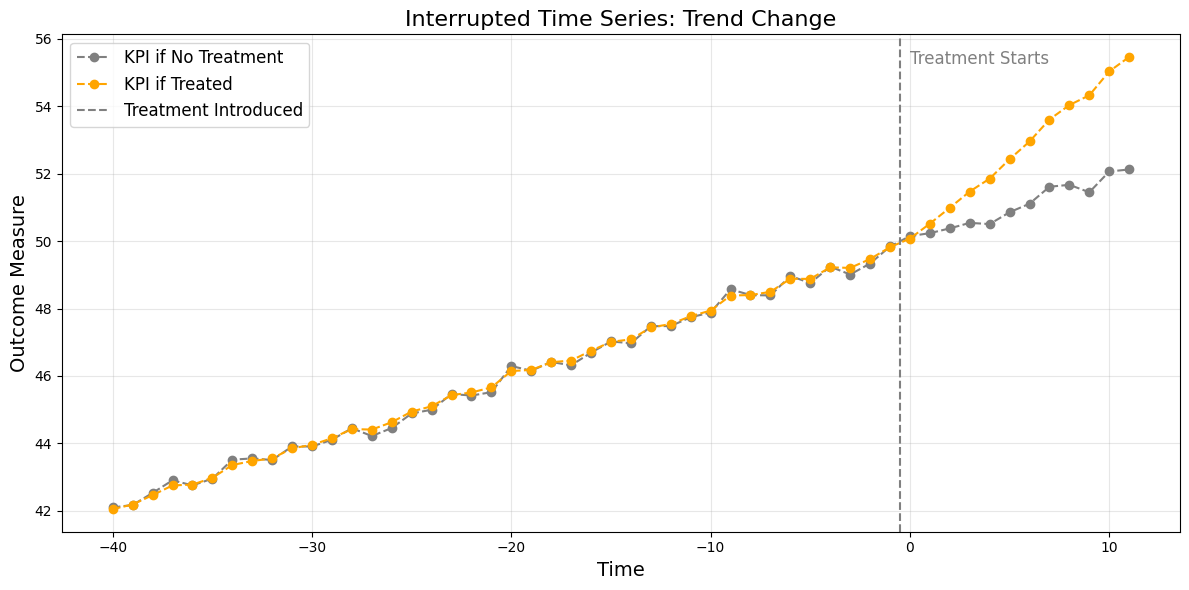

In [21]:
# Simulate time series data
np.random.seed(42)
numobs = 52
event_period = 40  # Treatment starts at week 40 (4th quarter)

time_points = np.arange(numobs) - event_period 
control = np.random.normal(50, .1, numobs) + 0.2*time_points # Pre-treatment control trend

# Post-treatment divergence: trend change 
trend_change = np.arange(numobs) - event_period 
trend_change[:event_period] = 0
treated = control + 0.3*trend_change  

plot_data(time_points, untreated, treated)

In [22]:
# Estimate model with a trend change only

# prepare DataFrame for model
df = pd.DataFrame({
    'trend': time_points,
    'kpi': treated
})

# Fit an ITS model with trend change only
df['post'] = df['trend'] >= 0  # Indicator for dates on or after treatment
df['post_trend'] = df['post'] * df['trend'] # Interaction of trend and post 

model = smf.ols('kpi ~ trend + post_trend', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpi   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.986e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           2.06e-79
Time:                        16:51:36   Log-Likelihood:                 51.738
No. Observations:                  52   AIC:                            -97.48
Df Residuals:                      49   BIC:                            -91.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9530      0.026   1955.792      0.0

#### ITS with both a level and trend change

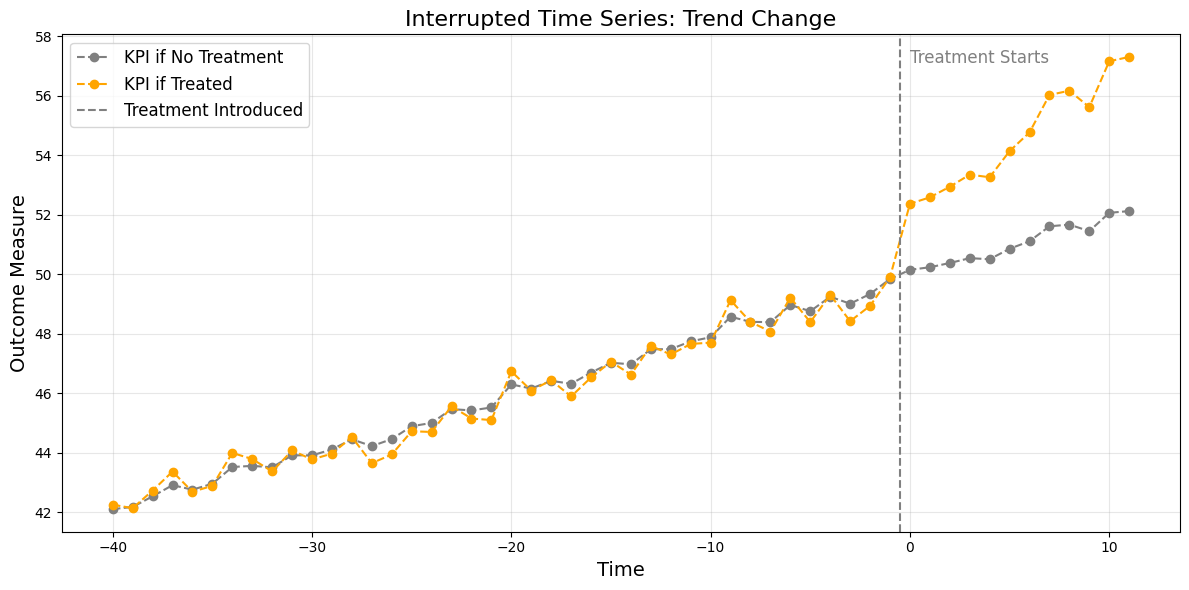

In [23]:
# Simulate time series data
np.random.seed(42)
numobs = 52
event_period = 40  # Treatment starts at week 40 (4th quarter)

time_points = np.arange(numobs) - event_period # recenter so trend is zero at event date
control = np.random.normal(50, .5, numobs) + 0.2*time_points # Pre-treatment control trend

# Post-treatment divergence: level change 
level_change = 2*np.ones(numobs)
level_change[:event_period] = 0

# Post-treatment divergence: trend change 
trend_change = np.arange(numobs) - event_period 
trend_change[:event_period] = 0
treated = control + 0.3*trend_change + level_change 

plot_data(time_points, untreated, treated)

In [24]:
# Estimate model with both a level and trend change

# prepare DataFrame for model
df = pd.DataFrame({
    'trend': time_points,
    'kpi': treated
})

# Fit an ITS model with both a level and trend change
df['post'] = df['trend'] >= 0  # Indicator for dates on or after treatment
df['post_trend'] = df['post'] * df['trend'] # Interaction of trend and post 

model = smf.ols('kpi ~ trend + post + post_trend', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpi   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1495.
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           2.21e-47
Time:                        16:51:36   Log-Likelihood:                -31.301
No. Observations:                  52   AIC:                             70.60
Df Residuals:                      48   BIC:                             78.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       49.6815      0.148    335.303   